In [3]:
import pandas as pd
import numpy as np



In [4]:
df = pd.read_csv("./dataset/label지정.csv", encoding="cp949")
df 

,회사명,거래소코드,회계년도,상장일,상장폐지일,산업명,소속코드,[제조]매출액증가율,[제조]유형자산증가율,[제조]비유동자산증가율,...,[제조]기계투자효율,[제조]부가가치율,[제조]노동소득분배율,[제조]자본분배율,[제조]이윤분배율,[제조]유형자산회전율,[제조]이자보상배율(이자비용),year,month,label
0,(주)CMG제약,58820,2011-12-01,2001-08-31,NaN,의료용 물질 및 의약품 제조업,5,56.40,-5.90,-12.89,...,128.51,19.56,89.82,10.18,-43.44,1.77,3.53,2011,12,0
1,(주)CMG제약,58820,2012-12-01,2001-08-31,NaN,의료용 물질 및 의약품 제조업,5,-8.43,-4.12,-16.43,...,10.67,1.66,1749.87,-1649.87,-2473.07,1.71,-7.75,2012,12,0
2,(주)CMG제약,58820,2013-12-01,2001-08-31,NaN,의료용 물질 및 의약품 제조업,5,25.51,16.09,77.05,...,289.40,34.29,71.28,28.72,4.23,2.03,0.70,2013,12,0
3,(주)CMG제약,58820,2014-12-01,2001-08-31,NaN,의료용 물질 및 의약품 제조업,5,11.52,74.30,68.15,...,132.06,31.04,79.30,20.70,2.24,1.54,3.60,2014,12,0
4,(주)CMG제약,58820,2015-12-01,2001-08-31,NaN,의료용 물질 및 의약품 제조업,5,18.85,-5.37,1.66,...,90.92,15.96,144.10,-44.10,-84.58,1.48,-32.22,2015,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10657,흥구석유(주),24060,2016-12-01,1994-12-07,NaN,도매 및 상품 중개업,5,-7.26,-5.61,0.11,...,3684.02,4.86,48.08,51.92,31.14,3.67,7.66,2016,12,0
10658,흥구석유(주),24060,2017-12-01,1994-12-07,NaN,도매 및 상품 중개업,5,8.12,-0.56,-0.48,...,4786.26,4.39,47.63,52.37,30.24,4.10,5.91,2017,12,0
10659,흥구석유(주),24060,2018-12-01,1994-12-07,NaN,도매 및 상품 중개업,5,6.87,-0.36,-2.09,...,3064.10,4.44,47.47,52.53,32.14,4.40,12.66,2018,12,0
10660,흥구석유(주),24060,2019-12-01,1994-12-07,NaN,도매 및 상품 중개업,5,-9.35,-7.00,-2.63,...,3489.21,10.00,22.19,77.81,55.02,4.14,252.02,2019,12,0


In [5]:
df.drop(['year', 'month'], axis=1, inplace=True)

# Decision Tree

### 윈저라이징

In [34]:
df2 = df.copy()
df2 = df2[[ '[제조]자기자본배율', '[제조]기계투자효율', '[제조]매입채무회전률', '[제조]자기자본순이익률', '[제조]총자본투자효율', '[제조]부가가치', '[제조]유동비율', '[제조]1주당매출액', '[제조]재고자산증가율','label']]
df2

,[제조]자기자본배율,[제조]기계투자효율,[제조]매입채무회전률,[제조]자기자본순이익률,[제조]총자본투자효율,[제조]부가가치,[제조]유동비율,[제조]1주당매출액,[제조]재고자산증가율,label
0,82.55,128.51,11.95,-8.28,12.72,3472.17,200.97,406.28,-1.43,0
1,95.69,10.67,7.83,-26.84,0.47,269.31,693.49,332.74,7.73,0
2,113.12,289.40,6.20,0.74,12.51,6994.90,694.71,235.52,56.29,0
3,113.13,132.06,5.27,0.32,12.16,7061.34,324.58,262.65,6.37,0
4,106.02,90.92,5.66,-7.62,7.63,4315.37,296.85,306.26,11.04,0
...,...,...,...,...,...,...,...,...,...,...
10657,4611.84,3684.02,179609.18,3.17,8.84,6993.48,411.65,9589.39,52.46,0
10658,4650.29,4786.26,5044.25,2.97,8.54,6826.79,177.50,10367.77,9.41,0
10659,4696.15,3064.10,5128.70,3.38,9.80,7373.52,329.17,11080.55,-46.09,0
10660,5133.42,3489.21,23497.93,11.25,18.02,15072.74,485.39,10044.58,96.40,0


In [35]:
df2.describe()

,[제조]자기자본배율,[제조]기계투자효율,[제조]매입채무회전률,[제조]자기자본순이익률,[제조]총자본투자효율,[제조]부가가치,[제조]유동비율,[제조]1주당매출액,[제조]재고자산증가율,label
count,1.066200e+04,1.066200e+04,1.066200e+04,10662.000000,10662.000000,1.066200e+04,10662.000000,1.066200e+04,10662.000000,10662.000000
mean,2.759195e+03,1.485140e+06,4.007902e+02,-15.882581,16.179218,3.262406e+04,318.593959,1.152961e+04,87.858023,0.015757
std,8.674142e+04,5.170670e+07,1.539365e+04,981.696080,23.905348,6.476272e+04,665.899481,4.021533e+04,3275.800579,0.124539
min,-1.390700e+03,-2.657909e+09,0.000000e+00,-101015.660000,-1023.570000,-7.107779e+05,3.140000,0.000000e+00,-99.970000,0.000000
25%,3.917225e+02,7.957000e+01,7.610000e+00,-7.490000,9.150000,6.768450e+03,107.592500,2.185373e+03,-11.220000,0.000000
50%,8.237700e+02,2.685100e+02,1.247500e+01,3.630000,17.370000,1.699587e+04,175.140000,5.307410e+03,0.000000,0.000000
75%,1.480533e+03,1.303918e+03,2.231750e+01,10.317500,25.200000,3.661774e+04,331.600000,1.112098e+04,22.117500,0.000000
max,6.266410e+06,1.418999e+09,1.182748e+06,348.190000,388.620000,1.393639e+06,42687.720000,2.586443e+06,313488.540000,1.000000


In [36]:
from scipy.stats.mstats import winsorize
import warnings
warnings.filterwarnings('ignore')

for col in df2.columns: 
     df2[col] = winsorize(df2[col], limits=0.01) # 범위. 양끝 0.01을 안쪽으로 넣어준다!)

df2.describe()

,[제조]자기자본배율,[제조]기계투자효율,[제조]매입채무회전률,[제조]자기자본순이익률,[제조]총자본투자효율,[제조]부가가치,[제조]유동비율,[제조]1주당매출액,[제조]재고자산증가율,label
count,10662.000000,1.066200e+04,10662.000000,10662.000000,10662.000000,10662.000000,10662.000000,10662.000000,10662.000000,10662.000000
mean,1155.595004,2.677133e+04,35.579723,-4.069547,16.532230,30922.311684,297.460998,9965.107211,18.858264,0.015757
std,1147.188970,2.023488e+05,113.627657,29.862056,16.594065,45585.218271,348.914536,15390.147452,88.655826,0.124539
min,42.590000,-1.210066e+04,0.000000,-163.900000,-48.200000,-29670.170000,28.410000,122.700000,-85.890000,0.000000
25%,391.722500,7.957000e+01,7.610000,-7.490000,9.150000,6768.450000,107.592500,2185.372500,-11.220000,0.000000
50%,823.770000,2.685100e+02,12.475000,3.630000,17.370000,16995.870000,175.140000,5307.410000,0.000000,0.000000
75%,1480.532500,1.303918e+03,22.317500,10.317500,25.200000,36617.742500,331.600000,11120.975000,22.117500,0.000000
max,6407.620000,1.921618e+06,956.580000,42.780000,66.570000,259340.490000,2214.570000,108670.230000,644.970000,1.000000


### Resampling

0    98.424311
1     1.575689
Name: label, dtype: float64


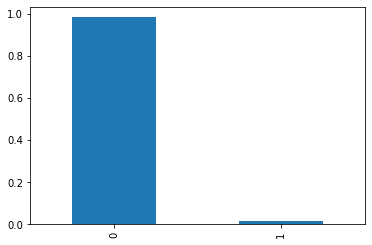

In [37]:
df2.label.value_counts(normalize=True).plot(kind='bar')
print(df2.label.value_counts(normalize=True)*100)

In [38]:
df_n = df2[df2['label'] == 0]
df_nc = df_n.columns
df_nc = df_nc.drop(['label'])
df_nc

Index(['[제조]자기자본배율', '[제조]기계투자효율', '[제조]매입채무회전률', '[제조]자기자본순이익률',
       '[제조]총자본투자효율', '[제조]부가가치', '[제조]유동비율', '[제조]1주당매출액', '[제조]재고자산증가율'],
      dtype='object')

In [39]:
import numpy as np 
from scipy import stats
from scipy.stats import shapiro

# shapiro_test = 0
list = [10000, 9000, 8000, 7000, 6000, 5000, 4000, 3000, 2000, 100]
for i in list:
    df_n = df_n.sample(n=i, random_state= 10)
    for j in df_nc:
        shapiro_test = stats.shapiro(df_n[j])
        if  shapiro_test[-1] != 0:
            print(i, j, shapiro_test[-1])
            break
        else:
            continue


7000 [제조]총자본투자효율 1.401298464324817e-44
6000 [제조]총자본투자효율 5.3978016845791954e-42
5000 [제조]총자본투자효율 1.6489093042694766e-39
4000 [제조]총자본투자효율 7.609332266223147e-37
3000 [제조]총자본투자효율 1.6730129308530141e-31
2000 [제조]자기자본배율 5.605193857299268e-45
100 [제조]자기자본배율 2.0045139159652337e-11


In [40]:
df_n[j]

1853     1194.16
10593     550.26
894       424.72
8209      579.39
3558      264.63
          ...   
5092      355.63
8675      407.96
1353      173.21
4289     3704.84
6180      689.95
Name: [제조]자기자본배율, Length: 100, dtype: float64

In [41]:
from sklearn.model_selection import train_test_split
X = df2.iloc[:,:-1]
y = df2.iloc[:,-1]
# X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [42]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE


In [63]:
# imbalanced-learn 패키지
from imblearn.combine import SMOTEENN

# SMOTE 객체 생성
smt = SMOTEENN(random_state=20,sampling_strategy=0.3)

X_res,y_res = smt.fit_resample(X,y)

# 샘플링
print('SMOTEENN 적용 전 학습용 피처/레이블 데이터 세트: ', X.shape, y.shape)
print('SMOTEENN 적용 후 학습용 피처/레이블 데이터 세트: ', X_res.shape, y_res.shape)
print('SMOTEENN 적용 후 레이블 값 분포: \n', pd.Series(y_res).value_counts())
y_res

SMOTEENN 적용 전 학습용 피처/레이블 데이터 세트:  (10662, 9) (10662,)
SMOTEENN 적용 후 학습용 피처/레이블 데이터 세트:  (11119, 9) (11119,)
SMOTEENN 적용 후 레이블 값 분포: 
 0    8800
1    2319
Name: label, dtype: int64


0        0
1        0
2        0
3        0
4        0
        ..
11114    1
11115    1
11116    1
11117    1
11118    1
Name: label, Length: 11119, dtype: int64

In [92]:
# imbalanced-learn 패키지
# from imblearn.under_sampling import  EditedNearestNeighbours
from imblearn.under_sampling import *
from imblearn import under_sampling as us

# us.NearMiss(
#     sampling_strategy='auto',
#     version=1,
#     n_neighbors=3,
#     n_neighbors_ver3=3,
#     n_jobs=None,
# )

enn = EditedNearestNeighbours(sampling_strategy=0.7)


X_res,y_res = enn.fit_resample(X,y)

# 샘플링
print('ENN 적용 전 학습용 피처/레이블 데이터 세트: ', X.shape, y.shape)
print('ENN 적용 후 학습용 피처/레이블 데이터 세트: ', X_res.shape, y_res.shape)
print('ENN 적용 후 레이블 값 분포: \n', pd.Series(y_res).value_counts())

ValueError: 'clean-sampling' methods do let the user specify the sampling ratio.

In [93]:
from imblearn.under_sampling import *

X_samp, y_samp = RandomUnderSampler(random_state=10,sampling_strategy=0.8).fit_resample(X, y)

print('RS 적용 전 학습용 피처/레이블 데이터 세트: ', X.shape, y.shape)
print('RS 적용 후 학습용 피처/레이블 데이터 세트: ', X_samp.shape, y_samp.shape)
print('RS 적용 후 레이블 값 분포: \n', pd.Series(y_samp).value_counts())

RS 적용 전 학습용 피처/레이블 데이터 세트:  (10662, 9) (10662,)
RS 적용 후 학습용 피처/레이블 데이터 세트:  (378, 9) (378,)
RS 적용 후 레이블 값 분포: 
 0    210
1    168
Name: label, dtype: int64


In [72]:
from imblearn.over_sampling import *

X_samp_1, y_samp_1 = RandomOverSampler(random_state=0,sampling_strategy=0.2).fit_resample(X, y)

print('RS 적용 전 학습용 피처/레이블 데이터 세트: ', X.shape, y.shape)
print('RS 적용 후 학습용 피처/레이블 데이터 세트: ', X_samp.shape, y_samp.shape)
print('RS 적용 후 레이블 값 분포: \n', pd.Series(y_samp).value_counts())

RS 적용 전 학습용 피처/레이블 데이터 세트:  (10662, 9) (10662,)
RS 적용 후 학습용 피처/레이블 데이터 세트:  (378, 9) (378,)
RS 적용 후 레이블 값 분포: 
 0    210
1    168
Name: label, dtype: int64


In [91]:
from imblearn.under_sampling import *

X_samp, y_samp = RandomUnderSampler(random_state=0,sampling_strategy=0.4).fit_resample(X_samp_1, y_samp_1)

print('RS 적용 전 학습용 피처/레이블 데이터 세트: ', X.shape, y.shape)
print('RS 적용 후 학습용 피처/레이블 데이터 세트: ', X_samp.shape, y_samp.shape)
print('RS 적용 후 레이블 값 분포: \n', pd.Series(y_samp).value_counts())

RS 적용 전 학습용 피처/레이블 데이터 세트:  (10662, 9) (10662,)
RS 적용 후 학습용 피처/레이블 데이터 세트:  (7343, 9) (7343,)
RS 적용 후 레이블 값 분포: 
 0    5245
1    2098
Name: label, dtype: int64


In [81]:
X_samp

,[제조]자기자본배율,[제조]기계투자효율,[제조]매입채무회전률,[제조]자기자본순이익률,[제조]총자본투자효율,[제조]부가가치,[제조]유동비율,[제조]1주당매출액,[제조]재고자산증가율
0,82.55,128.51,11.95,-8.28,12.72,3472.17,200.97,406.28,-1.43
1,95.69,10.67,7.83,-26.84,0.47,269.31,693.49,332.74,7.73
2,113.12,289.40,6.20,0.74,12.51,6994.90,694.71,235.52,56.29
3,113.13,132.06,5.27,0.32,12.16,7061.34,324.58,262.65,6.37
4,106.02,90.92,5.66,-7.62,7.63,4315.37,296.85,306.26,11.04
...,...,...,...,...,...,...,...,...,...
12587,42.59,-936.72,47.34,0.00,-41.99,-13849.66,38.49,838.42,0.00
12588,42.59,0.00,0.00,0.00,-48.20,-29670.17,49.31,842.89,-81.78
12589,311.75,133.58,48.00,0.42,22.42,51584.49,205.98,2257.89,29.21
12590,90.99,-2347.95,5.50,-92.22,-48.20,-14071.56,65.99,190.35,0.00
